In [1]:
import numpy as np
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\Ashitha A
[nltk_data]     Nair\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
web_train=pd.read_csv('web_categ_final.csv')
web_train.head(15)

,Webpage_id,Tag,text
0,1,news,b' Skip to main content ...
1,2,news,b' Skip to main content ...
2,3,news,b' Skip to main content ...
3,4,news,"b"" Skip to main content ..."
4,5,news,"b"" Skip to main content ..."
5,6,news,"b"" Skip to main content ..."
6,7,news,b' Skip to main content ...
7,8,news,"b"" Skip to main content ..."
8,9,news,"b"" Skip to main content ..."
9,10,news,b' Skip to main content ...


In [3]:
web_train['Tag'].value_counts()

others            17417
news               7992
publication        7705
profile            5196
conferences        4666
forum              4503
clinicalTrials     2839
thesis             1800
guidelines         1329
Name: Tag, dtype: int64

## Preprocessing
- you can see it has many noise in it, we have to clean this


In [4]:
for text in web_train['text'][:8]:
    print("\n\n",text)



 b'    Skip to main content                                    Twitter  LinkedIn      Search           Top Menu    DDF 2017    FierceBiotech    Jobs    Resources    Events    Subscribe                  Main navigation    Pharma    M&A    Regulatory    Financials    Corporate    Legal      Manufacturing    M&A    Outsourcing    Regulatory    Supply Chain    Partnering    Drug Safety      Marketing    Regulatory    DTC Advertising    Digital and Social Media    Data and Analytics    Launches      Pharma Asia    M&A    R&D    Regulatory    Sales and Marketing    Financials    Manufacturing      Animal Health    R&D    M&A    Regulatory    Veterinarian    Financials    Vaccines      Drug Delivery    R&D    Regulatory    Partnering      Vaccines    Deals    Infectious Diseases    R&D    Regulatory        Main navigation - Mobile    Pharma    M&A    Regulatory    Financials    Corporate    Legal      Manufacturing    M&A    Outsourcing    Regulatory    Supply Chain    Partnering    Drug Sa

In [37]:
stop_words=set(stopwords.words('english'))

def clean_text(text):
    #converting to lowercase
    text=text.lower()
    
    #removing links
    text=re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b','',text)
    
    #removing text inside()
    text=re.sub(r'\([^)]*\)','',text)
    
    #removing text inside
    text=re.sub(r'\{[^)]*\}','',text)
    
    #maintaining only alphabets
    text=re.sub("[^a-zA-Z]"," ",text)
    
    #removing stopwords
    tokens=[w for w in text.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=4:
            long_words.append(i)
    return(" ".join(long_words)).strip()

In [30]:
text=web_train['text'][2]
clean_text=clean_text(text)

In [39]:
# web_train['Cleaned_text']=web_train['text'].apply(lambda x:clean_text(x))

In [38]:
cleaned_text=[]
for i in web_train['text']:
    cleaned_text.append(clean_text(i))    

In [40]:
web_train

,Webpage_id,Tag,text
0,1,news,b' Skip to main content ...
1,2,news,b' Skip to main content ...
2,3,news,b' Skip to main content ...
3,4,news,"b"" Skip to main content ..."
4,5,news,"b"" Skip to main content ..."
...,...,...,...
53442,79341,profile,"b"" Contact Us ..."
53443,79342,profile,"b"" Contact Us ..."
53444,79343,profile,"b"" Contact Us ..."
53445,79344,profile,"b"" Contact Us ..."


In [42]:
#label encoding
web_train[['Tag']]

,Tag
0,news
1,news
2,news
3,news
4,news
...,...
53442,profile
53443,profile
53444,profile
53445,profile


In [45]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
y=encode.fit_transform(web_train['Tag'])

In [46]:
y

array([4, 4, 4, ..., 6, 6, 6])

In [49]:
#validation split
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(cleaned_text,y,test_size=0.3,random_state=42)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C0E6DA8E88>]],
      dtype=object)

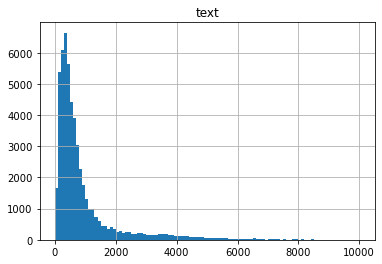

In [61]:
#padding
#finding the length of the words using hist plot
#from the histogram we can observe that most of the sequences fall undere rthe lenght of 500
#hence max length is 500
import matplotlib.pyplot as plt

text_word_count=[]
for i in cleaned_text:
    text_word_count.append(len(i.split()))
length_df=pd.DataFrame({'text':text_word_count})

length_df.hist(bins=100,range=(0,10000))

In [62]:
max_length=500

In [ ]:
#preparing tokenizer

